データサイエンス特論授業課題第3回
作成日: 2022年7月2日
作成者: M1 203324 紺谷優志



In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

In [33]:
def DCG(rank:list[int]) -> np.ndarray:
    dcg=np.zeros(len(rank))
    for i in range(len(rank)):
        if i==0:
            dcg[i]=rank[i]
        elif i==1:
            dcg[i]=dcg[i-1]+rank[i]
        else:
            dcg[i]=dcg[i-1]+(rank[i]/np.log2(i+1))
    return dcg

In [38]:
def nDCG(dcg:np.ndarray,idcg:np.ndarray)->np.ndarray:
    ndcg=np.zeros((2,dcg.size))
    for i in range(dcg.size):
        ndcg[0,i]=i
        ndcg[1,i]=dcg[i]/idcg[i]
    return ndcg

In [59]:
# "blue paroot in a cage"
#「カゴの中の青いオウム」なので、オウムの体色に青が少ないものや、オウムがいなかったりカゴの外にいる場合減点対象としている
#rank_google=[3,3,3,3,1,3,1,3,1,3,2,3,3,0,0,0,1,1,0,0]
#rank_bing=  [0,3,3,3,1,0,1,1,2,1,2,0,3,2,3,0,1,3,0,1]

rank_google=[3,3,2,3,3,3,3,3,2,2,0,3,3,1,1,3,0,0,3,0]
rank_bing=[3,3,3,3,3,2,2,3,2,2,3,3,3,2,3,3,3,2,2,2]
rank_ideal= [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1]

dcg_google=DCG(rank_google)
dcg_bing=DCG(rank_bing)
idcg=DCG(rank_ideal)
ndcg_google=nDCG(dcg_google,idcg)
ndcg_bing=nDCG(dcg_bing,idcg)

In [60]:
ndcg_google,ndcg_bing

(array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
          5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
         10.        , 11.        , 12.        , 13.        , 14.        ,
         15.        , 16.        , 17.        , 18.        , 19.        ],
        [ 1.        ,  1.        ,  0.92006251,  0.93282829,  0.94095082,
          0.9467362 ,  0.95114373,  0.95465504,  0.9363143 ,  0.92086618,
          0.888288  ,  0.90848182,  0.92681336,  0.91433347,  0.90285424,
          0.91858749,  0.89549828,  0.88460067,  0.90957264,  0.89914016]]),
 array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
          5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
         10.        , 11.        , 12.        , 13.        , 14.        ,
         15.        , 16.        , 17.        , 18.        , 19.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          0.96734145,  0.94246089

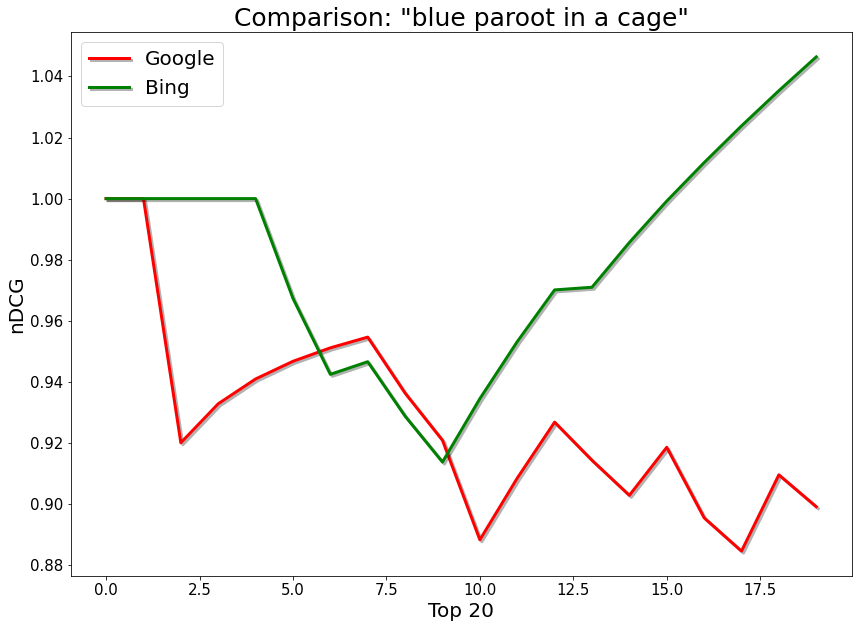

In [62]:
plt.figure(figsize=(14, 10))
plt.plot(ndcg_google[0, :], ndcg_google[1, :], color="red", label="Google", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.plot(ndcg_bing[0, :], ndcg_bing[1, :], color="green", label="Bing", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel("Top 20",fontsize=20)
plt.ylabel("nDCG",fontsize=20)
plt.title("Comparison: \"blue paroot in a cage\"",fontsize=25)
plt.legend(["Google","Bing"],loc="best",fontsize=20)
plt.savefig("kadai3-nDCG-1.pdf")

In [63]:
# "black owl sleeping at night"
#「夜に寝る黒いフクロウ」なので、フクロウの体色に黒が少ない、夜ではない、寝ていない、フクロウではない場合に減点

rank_google=[3,2,3,2,1,2,1,3,3,1,0,2,3,2,1,2,3,1,1,0]
rank_bing=  [1,2,1,2,1,2,2,3,1,1,1,1,2,3,2,1,1,1,1,1]
rank_ideal= [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1]

dcg_google=DCG(rank_google)
dcg_bing=DCG(rank_bing)
idcg=DCG(rank_ideal)
ndcg_google=nDCG(dcg_google,idcg)
ndcg_bing=nDCG(dcg_bing,idcg)

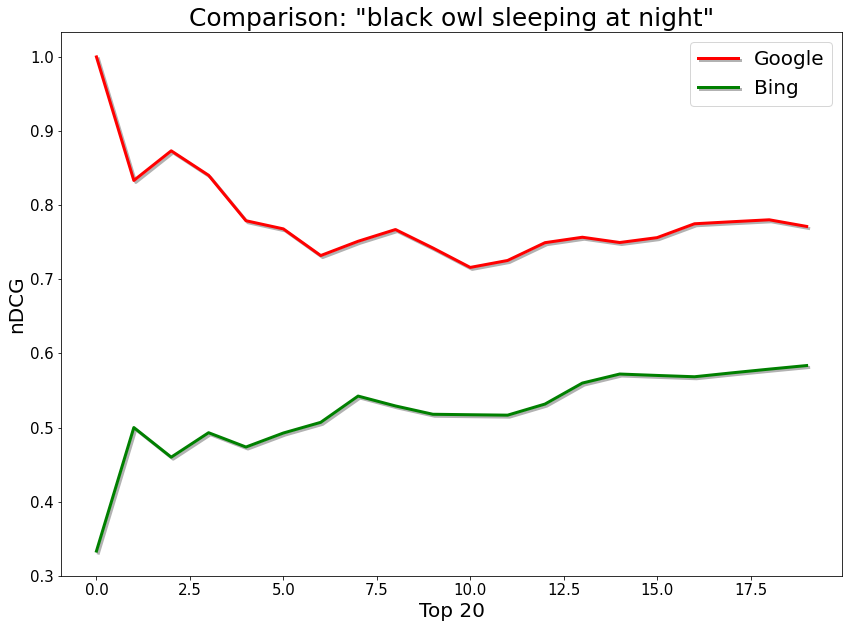

In [64]:
plt.figure(figsize=(14, 10))
plt.plot(ndcg_google[0, :], ndcg_google[1, :], color="red", label="Google", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.plot(ndcg_bing[0, :], ndcg_bing[1, :], color="green", label="Bing", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel("Top 20",fontsize=20)
plt.ylabel("nDCG",fontsize=20)
plt.title("Comparison: \"black owl sleeping at night\"",fontsize=25)
plt.legend(["Google","Bing"],loc="best",fontsize=20)
plt.savefig("kadai3-nDCG-2.pdf")